In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [2]:
# Builing model with sub-levels

In [3]:
df = pd.read_csv('cubic_zirconia.csv')

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
# unique values for categorical variables

for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(), ': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




In [7]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [8]:
df['cut']=np.where(df['cut'] == 'Very Good', 'Good', df['cut'])

In [9]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Fair'], dtype=object)

In [12]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,NaN,NaN,NaN,13484.0,7784.846691,1.0,6742.5,13484.0,20225.5,26967.0
carat,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,4,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270.0,NaN,NaN,NaN,61.745147,1.41286,50.8,61.0,61.8,62.5,73.6
table,26967.0,NaN,NaN,NaN,57.45608,2.232068,49.0,56.0,57.0,59.0,79.0
x,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.9
z,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.9,3.52,4.04,31.8


In [13]:
# Checking null values

df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [14]:
# Percentage of missing values

100*df.isnull().sum()/len(df)

Unnamed: 0    0.00000
carat         0.00000
cut           0.00000
color         0.00000
clarity       0.00000
depth         2.58464
table         0.00000
x             0.00000
y             0.00000
z             0.00000
price         0.00000
dtype: float64

In [15]:
# Check for duplicates

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [16]:
# unique values for categorical variables

for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(), ': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  4
Fair         781
Premium     6899
Good        8471
Ideal      10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




In [17]:
df[['carat','depth','table','x','y','z']].nunique()

carat    257
depth    169
table    112
x        531
y        526
z        356
dtype: int64

#### Univariate/Bivariate Analysis

Text(0.5, 1.0, 'x Distribution')

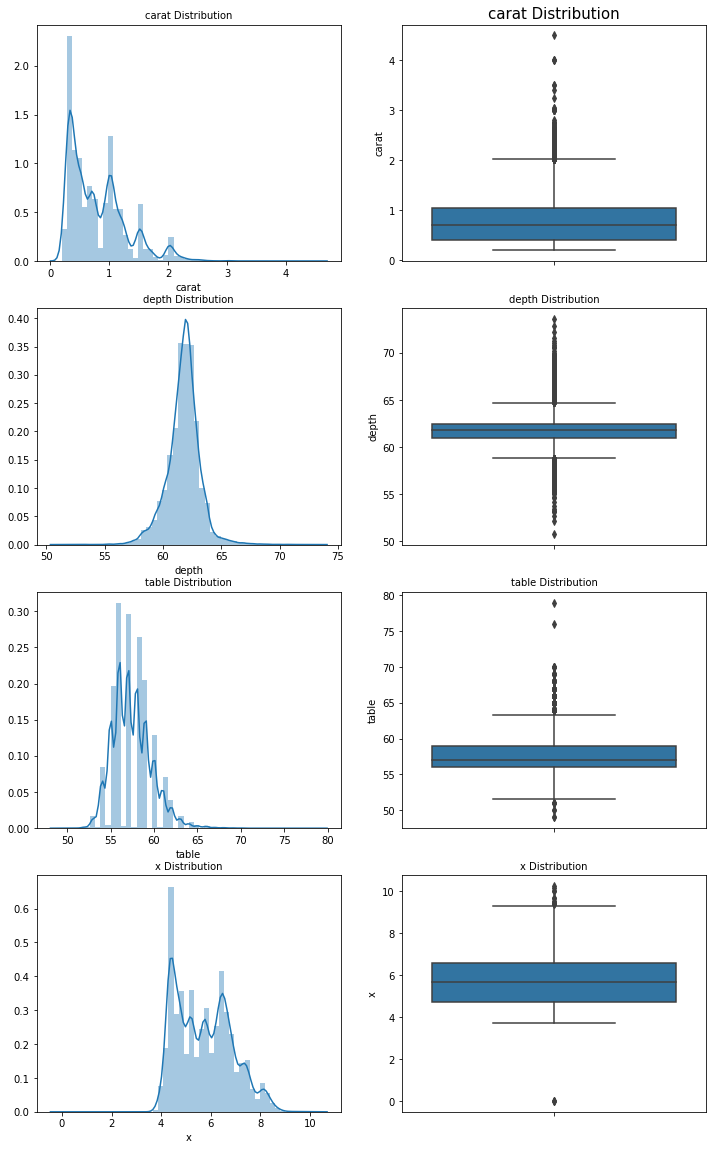

In [18]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 20)
a = sns.distplot(df['carat'] , ax=axes[0][0])
a.set_title("carat Distribution",fontsize=10)
a = sns.boxplot(df['carat'] , orient = "v" , ax=axes[0][1])
a.set_title("carat Distribution",fontsize=15)

a = sns.distplot(df['depth'] , ax=axes[1][0])
a.set_title("depth Distribution",fontsize=10)

a = sns.boxplot(df['depth'] , orient = "v" , ax=axes[1][1])
a.set_title("depth Distribution",fontsize=10)

a = sns.distplot(df['table'] , ax=axes[2][0])
a.set_title("table Distribution",fontsize=10)

a = sns.boxplot(df['table'] , orient = "v" , ax=axes[2][1])
a.set_title("table Distribution",fontsize=10)

a = sns.distplot(df['x'] , ax=axes[3][0])
a.set_title("x Distribution",fontsize=10)

a = sns.boxplot(df['x'] , orient = "v" , ax=axes[3][1])
a.set_title("x Distribution",fontsize=10)

Text(0.5, 1.0, 'price Distribution')

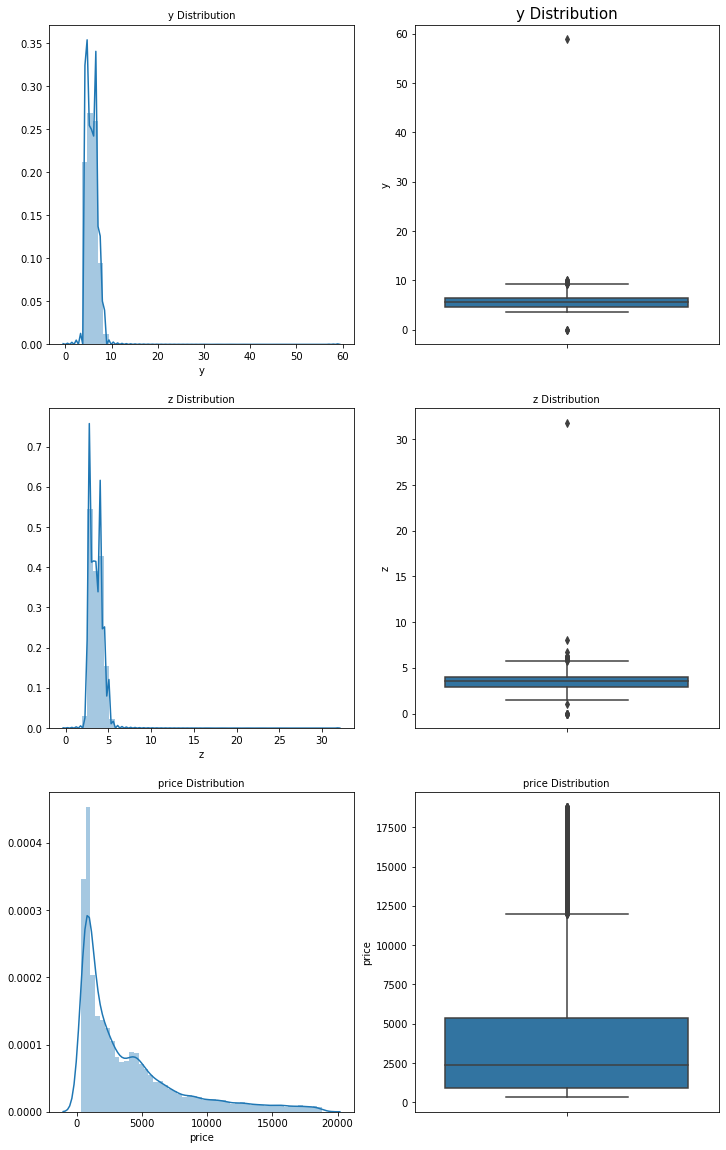

In [19]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12, 20)
a = sns.distplot(df['y'] , ax=axes[0][0])
a.set_title("y Distribution",fontsize=10)
a = sns.boxplot(df['y'] , orient = "v" , ax=axes[0][1])
a.set_title("y Distribution",fontsize=15)

a = sns.distplot(df['z'] , ax=axes[1][0])
a.set_title("z Distribution",fontsize=10)

a = sns.boxplot(df['z'] , orient = "v" , ax=axes[1][1])
a.set_title("z Distribution",fontsize=10)

a = sns.distplot(df['price'] , ax=axes[2][0])
a.set_title("price Distribution",fontsize=10)

a = sns.boxplot(df['price'] , orient = "v" , ax=axes[2][1])
a.set_title("price Distribution",fontsize=10)

In [20]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [21]:
df.skew()

Unnamed: 0    0.000000
carat         1.116481
depth        -0.028618
table         0.765758
x             0.387986
y             3.850189
z             2.568257
price         1.618550
dtype: float64

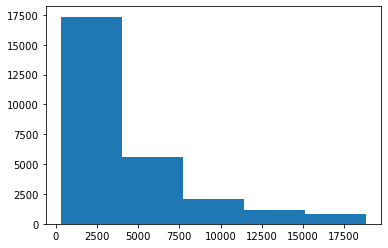

In [22]:
plt.hist(df.price, bins = 5)
plt.show()

##### Categorical Variables

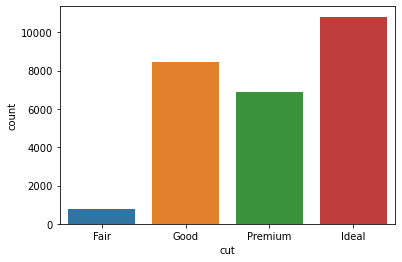

In [23]:
sns.countplot(df['cut'], order = ['Fair','Good', 'Premium', 'Ideal'])

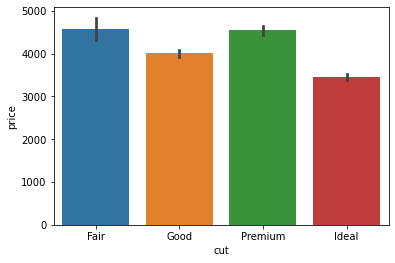

In [24]:
sns.barplot(data = df, x='cut',y='price',order = ['Fair', 'Good', 'Premium', 'Ideal'])

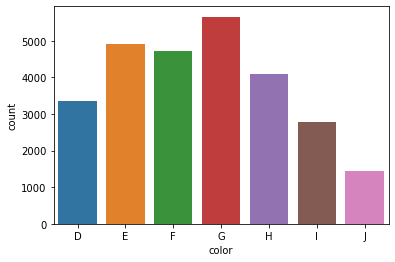

In [25]:
sns.countplot(df['color'] ,order = ['D', 'E', 'F', 'G','H', 'I', 'J'])

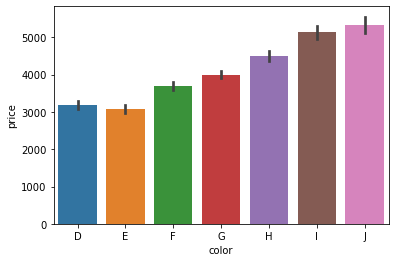

In [26]:
sns.barplot(data = df, x='color',y='price',order = ['D', 'E', 'F', 'G','H', 'I', 'J'] )

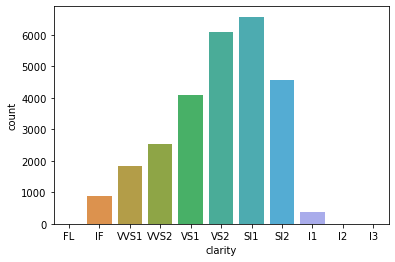

In [27]:
sns.countplot(df['clarity'], order = ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'])

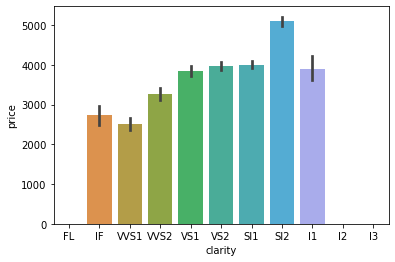

In [28]:
sns.barplot(data = df, x='clarity',y='price', order =['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'])

In [29]:
pd.crosstab(df['cut'], df['color'])

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,74,100,148,147,150,94,68
Good,1053,1677,1521,1573,1239,893,515
Ideal,1409,1966,1893,2470,1552,1073,453
Premium,808,1174,1167,1471,1161,711,407


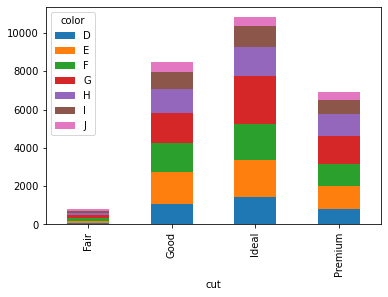

In [30]:
pd.crosstab(df['cut'], df['color']).plot(kind = 'bar', stacked = True)

In [31]:
pd.crosstab(df['cut'], df['clarity'])

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
cut,,,,,,,,
Fair,89,4,193,225,93,129,10,38
Good,94,162,2419,1577,1218,1745,486,770
Ideal,74,613,2150,1324,1784,2528,1036,1307
Premium,108,115,1809,1449,998,1697,307,416


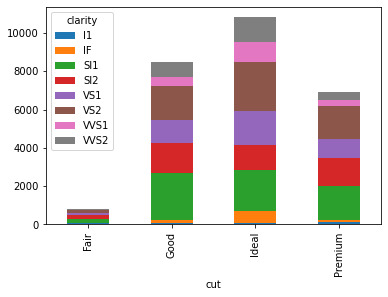

In [32]:
pd.crosstab(df['cut'], df['clarity']).plot(kind = 'bar', stacked = True)

In [33]:
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')

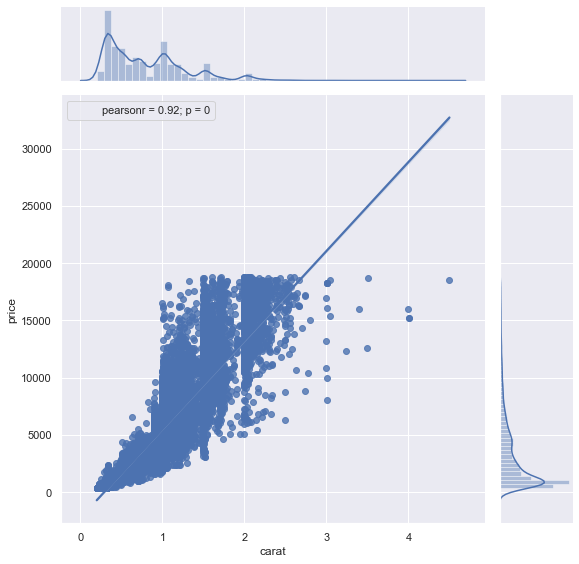

In [34]:
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot('carat', 'price', data = df, kind='reg', height=8)
j.annotate(stats.pearsonr)
plt.show()

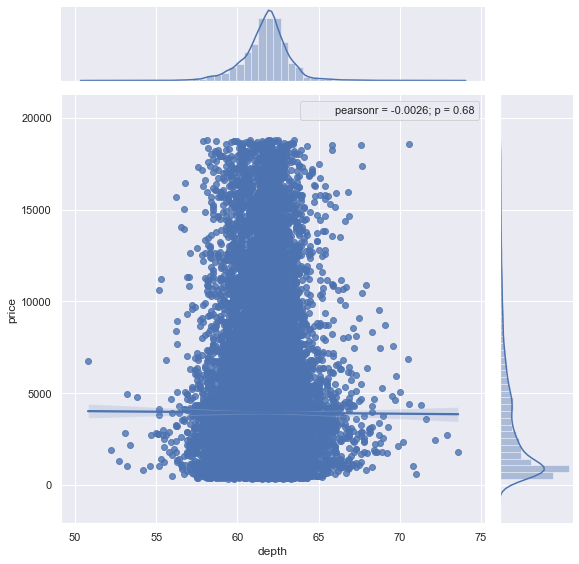

In [35]:
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot('depth', 'price', data = df, kind='reg', height=8)
j.annotate(stats.pearsonr)
plt.show()

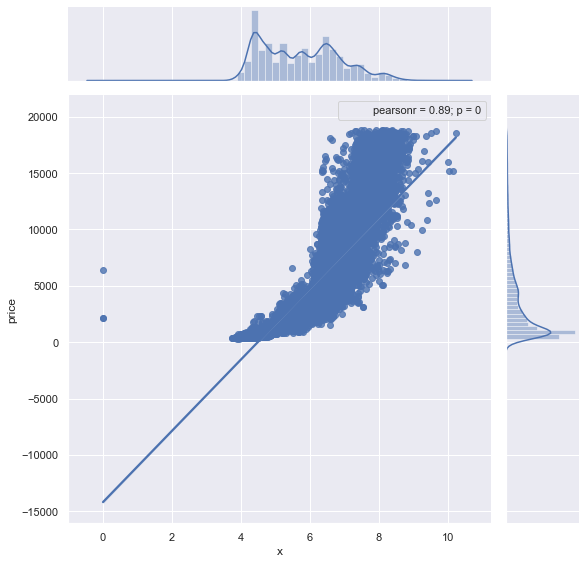

In [36]:
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot('x', 'price', data = df, kind='reg', height=8)
j.annotate(stats.pearsonr)
plt.show()

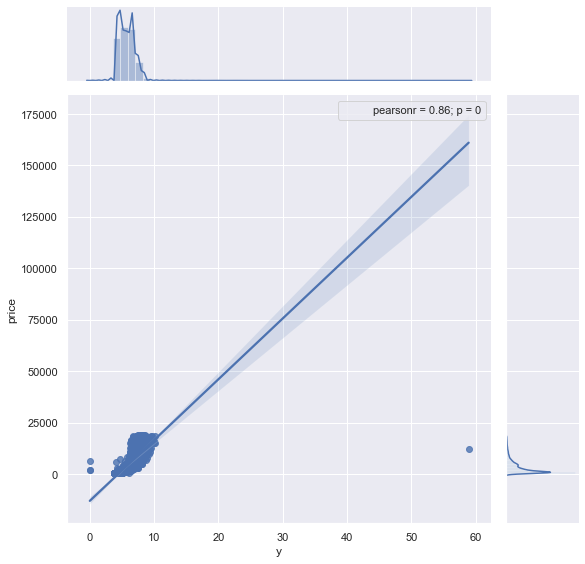

In [37]:
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot('y', 'price', data = df, kind='reg', height=8)
j.annotate(stats.pearsonr)
plt.show()

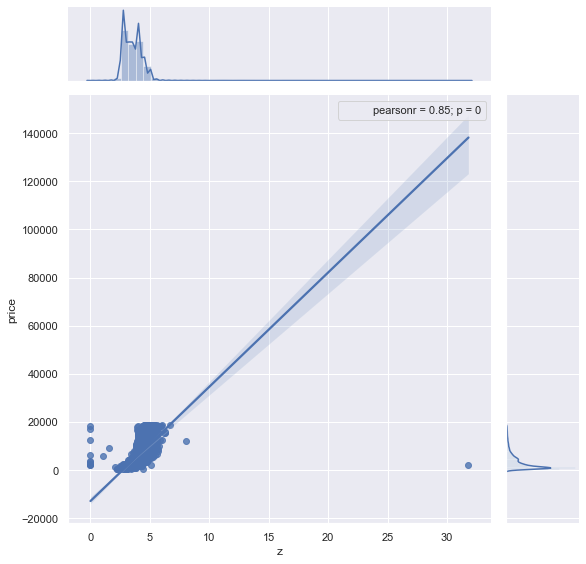

In [38]:
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot('z', 'price', data = df, kind='reg', height=8)
j.annotate(stats.pearsonr)
plt.show()

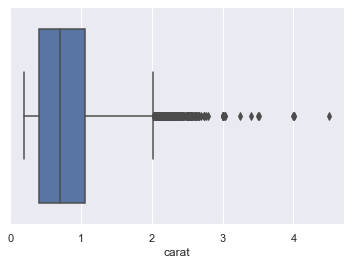

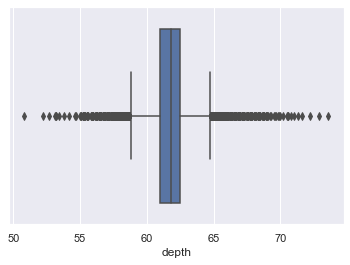

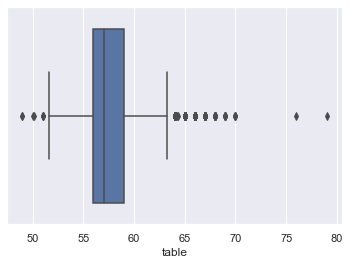

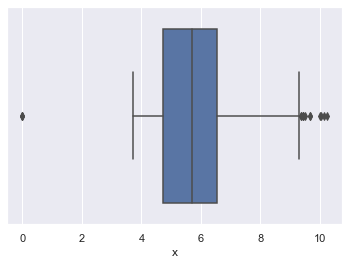

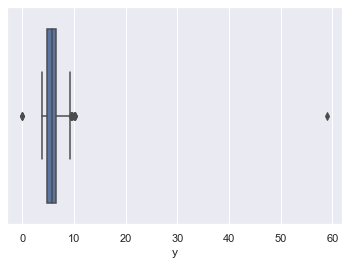

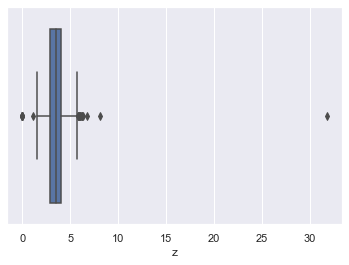

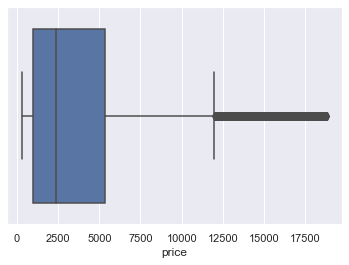

In [39]:
cols = ['carat' ,'depth', 'table', 'x', 'y', 'z',
       'price']

for i in cols:
    sns.boxplot(df[i])
    plt.show()

#### Data Distribution

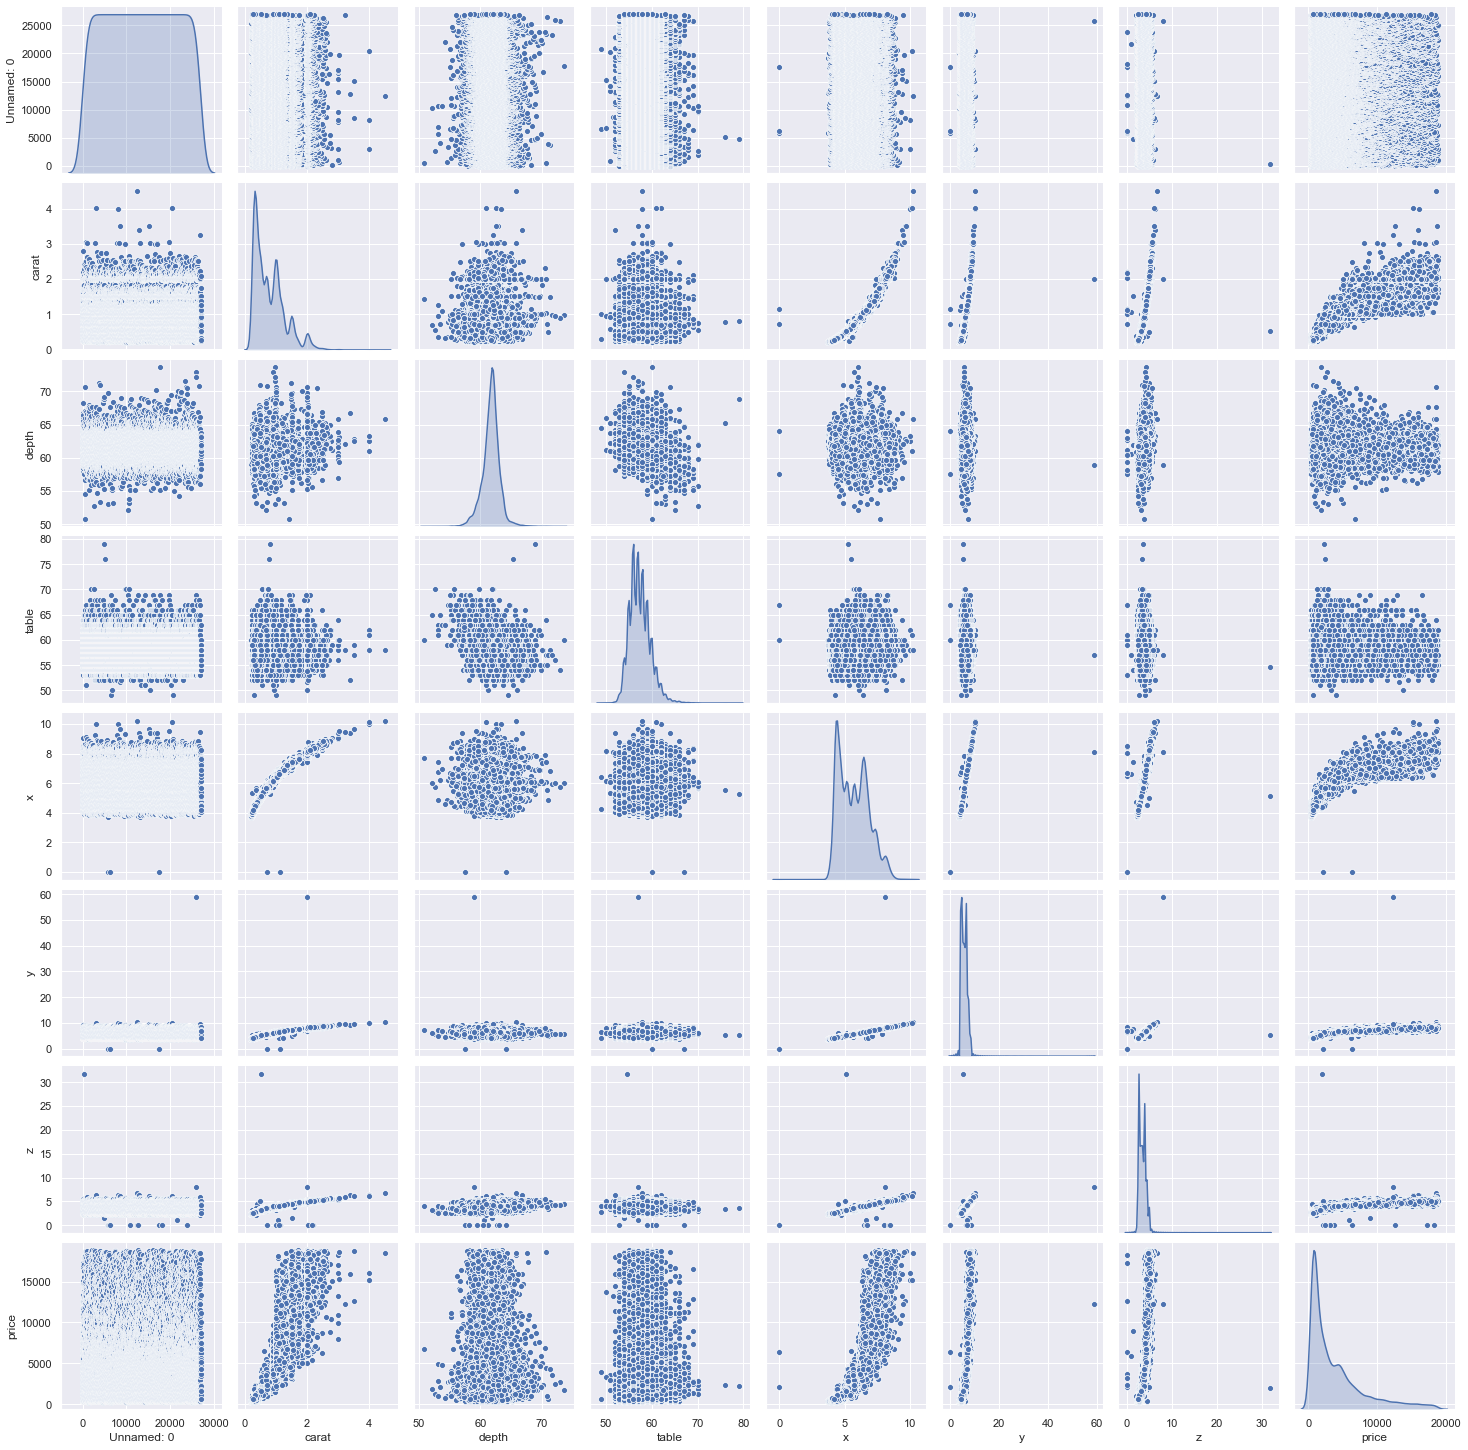

In [40]:
sns.pairplot(df, diag_kind='kde')  
plt.show()

#### Checking for Correlations

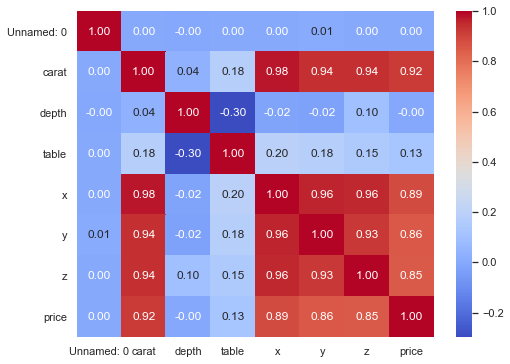

In [41]:
df_cor = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_cor, annot=True, fmt = '.2f', cmap='coolwarm')

In [42]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [43]:
df[df.isin([0])].stack(0)

5821   x    0.0
       y    0.0
       z    0.0
6034   z    0.0
6215   x    0.0
       y    0.0
       z    0.0
10827  z    0.0
12498  z    0.0
12689  z    0.0
17506  x    0.0
       y    0.0
       z    0.0
18194  z    0.0
23758  z    0.0
dtype: object

In [44]:
df.loc[((df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0))]

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
5821,5822,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,6035,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,6216,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,10828,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,12499,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,12690,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,17507,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,18195,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,23759,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [45]:
df.drop(df[((df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0))].index, inplace=True)

In [46]:
df[df.isin([0])].stack(0)

Series([], dtype: object)

In [47]:
for column in df.columns:
    if df[column].dtype != 'object':
        median = df[column].median()
        df[column] = df[column].fillna(median)    
        
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [48]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [49]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# get numeric data
num_d = df.select_dtypes(exclude=['object'])

# update the cols with their normalized values
df[num_d.columns] = sc.fit_transform(num_d)

In [50]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.731904,-1.043125,Ideal,E,SI1,0.253399,0.244112,-1.295920,-1.240065,-1.224865,-0.854851
1,-1.731776,-0.980310,Premium,G,IF,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,-0.734303
2,-1.731647,0.213173,Good,E,VVS2,0.325134,1.140496,0.275049,0.331668,0.335404,0.584271
3,-1.731519,-0.791865,Ideal,F,VS1,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,-0.709945
4,-1.731390,-1.022187,Ideal,F,VVS1,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,-0.785257


##### Outliers Check

In [51]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

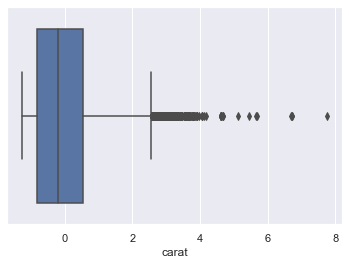

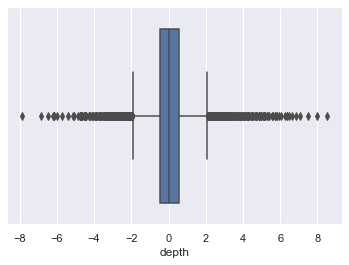

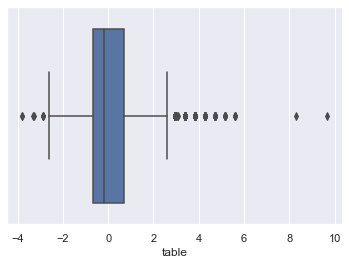

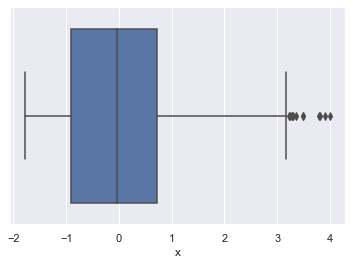

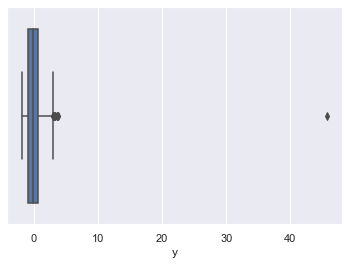

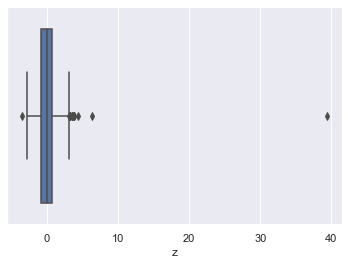

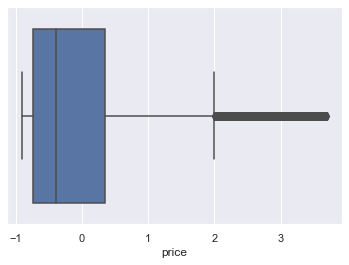

In [52]:
cols = ['carat' ,'depth', 'table', 'x', 'y', 'z',
       'price']

for i in cols:
    sns.boxplot(df[i])
    plt.show()

In [53]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='object')].index

In [54]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [55]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

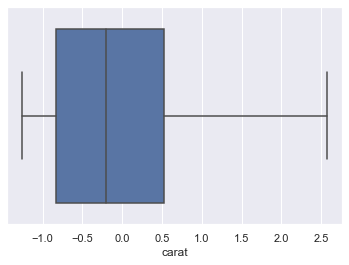

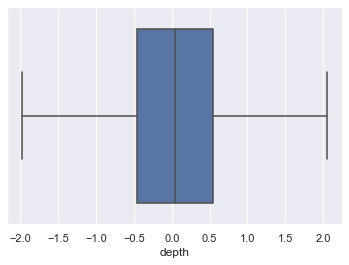

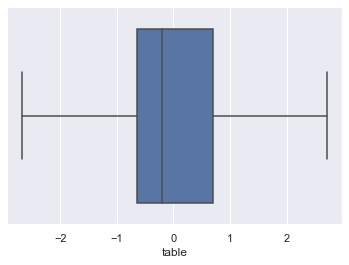

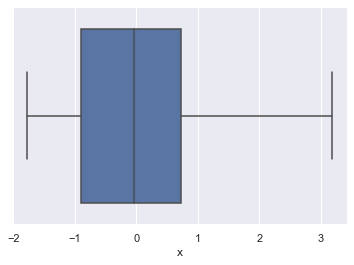

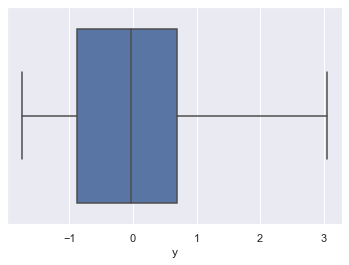

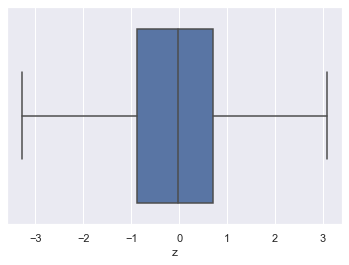

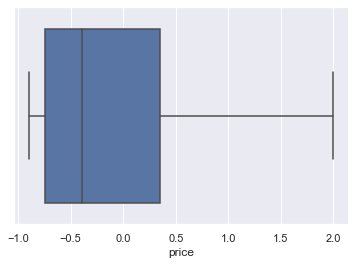

In [56]:
cols = ['carat' ,'depth', 'table', 'x', 'y', 'z',
       'price']

for i in cols:
    sns.boxplot(df[i])
    plt.show()

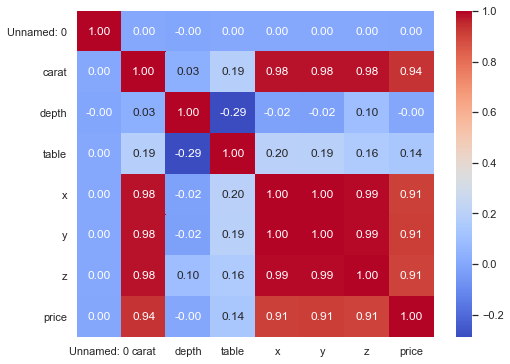

In [57]:
df_cor = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_cor, annot=True, fmt = '.2f', cmap='coolwarm')

#### 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [58]:
### Converting categorical to dummy variables in data

In [59]:
data = pd.get_dummies(df, columns=['cut','color','clarity'],drop_first=True)

In [60]:
data.head()

,Unnamed: 0,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.731904,-1.043125,0.253399,0.244112,-1.295920,-1.240065,-1.224865,-0.854851,0,1,...,0,0,0,0,1,0,0,0,0,0
1,-1.731776,-0.980310,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,-0.734303,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-1.731647,0.213173,0.325134,1.140496,0.275049,0.331668,0.335404,0.584271,1,0,...,0,0,0,0,0,0,0,0,0,1
3,-1.731519,-0.791865,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,-0.709945,0,1,...,0,0,0,0,0,0,1,0,0,0
4,-1.731390,-1.022187,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,-0.785257,0,1,...,0,0,0,0,0,0,0,0,1,0


In [61]:
data.columns

Index(['Unnamed: 0', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

#### Train/ Test split

In [62]:
# drop the id column as it is useless for the model
data_model = data.drop(columns=['Unnamed: 0'], axis=1)

In [63]:
data_model.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'color_E', 'color_F', 'color_G', 'color_H',
       'color_I', 'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2',
       'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [64]:
data_model.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043125,0.253399,0.244112,-1.295920,-1.240065,-1.224865,-0.854851,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.980310,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,-0.734303,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.213173,0.325134,1.140496,0.275049,0.331668,0.335404,0.584271,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.791865,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,-0.709945,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.022187,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,-0.785257,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [65]:
# Copy all the predictor variables into X dataframe
X = data_model.drop('price', axis=1)

# Copy target into the y dataframe. 
y = data_model[['price']]

In [66]:
X.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,color_E,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043125,0.253399,0.244112,-1.295920,-1.240065,-1.224865,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,-0.980310,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.213173,0.325134,1.140496,0.275049,0.331668,0.335404,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,-0.791865,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.022187,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [67]:
X.shape

(26958, 22)

In [68]:
y.head()

,price
0,-0.854851
1,-0.734303
2,0.584271
3,-0.709945
4,-0.785257


In [69]:
y.shape

(26958, 1)

In [70]:
# Split X and y into training and test set in 70:30 ratio

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [72]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [73]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.102677643675933
The coefficient for depth is 0.0026598335322749744
The coefficient for table is -0.015068171563229243
The coefficient for x is -0.3141124999650798
The coefficient for y is 0.3046749078393516
The coefficient for z is -0.13216046334695788
The coefficient for cut_Good is 0.11432073599333384
The coefficient for cut_Ideal is 0.14766885951703368
The coefficient for cut_Premium is 0.14568423766263536
The coefficient for color_E is -0.04703466298535251
The coefficient for color_F is -0.06287100849363879
The coefficient for color_G is -0.1004629836071093
The coefficient for color_H is -0.20741796707431404
The coefficient for color_I is -0.32370262556310186
The coefficient for color_J is -0.4686151350500679
The coefficient for clarity_IF is 1.0010559427679449
The coefficient for clarity_SI1 is 0.6401330496880666
The coefficient for clarity_SI2 is 0.4303689001065578
The coefficient for clarity_VS1 is 0.8393453279276898
The coefficient for clarity_VS2

In [74]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.7547640167367966


In [75]:
# R square on training data
regression_model.score(X_train, y_train)

0.9418711571202334

In [76]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9380801521677695

In [77]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.20705151380359368

In [78]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.21662559740035145

#### Using Statsmodel library

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

In [81]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 33.31644213102772
depth ---> 4.461631970587766
table ---> 1.7305761274492844
x ---> 461.8849205570435
y ---> 462.7573930067428
z ---> 237.63484934205408
cut_Good ---> 10.378627375279843
cut_Ideal ---> 14.232168151865993
cut_Premium ---> 8.598516478802388
color_E ---> 2.3710558575934857
color_F ---> 2.3290500407398937


In [82]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,color_E,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
7598,-0.184654,1.114220,0.692304,-0.186479,-0.106356,-0.026801,1,0,0,0,...,0,0,0,0,0,1,0,0,0,-0.290884
8882,-1.043125,0.827280,0.244112,-1.295920,-1.222887,-1.169142,1,0,0,1,...,0,0,0,0,0,0,1,0,0,-0.843667
22763,-0.205593,1.544631,0.692304,-0.079973,-0.114944,0.070716,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-0.394531
6643,-0.917495,-1.109569,-0.652273,-0.958650,-0.956637,-1.043763,0,1,0,1,...,0,0,0,0,0,0,1,0,0,-0.710442
18701,1.804485,0.899015,-0.204081,1.526498,1.516910,1.630986,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1.233492


In [84]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'price'],
      dtype='object')

In [87]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat + depth + table + x+ y + z + cut_Good + cut_Ideal + cut_Premium + cut_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2', data = data_train).fit()
lm1.params

Intercept      -0.754764
carat           1.102678
depth           0.002660
table          -0.015068
x              -0.314112
y               0.304675
z              -0.132160
cut_Good        0.114321
cut_Ideal       0.147669
cut_Premium     0.145684
color_E        -0.047035
color_F        -0.062871
color_G        -0.100463
color_H        -0.207418
color_I        -0.323703
color_J        -0.468615
clarity_IF      1.001056
clarity_SI1     0.640133
clarity_SI2     0.430369
clarity_VS1     0.839345
clarity_VS2     0.767520
clarity_VVS1    0.943688
clarity_VVS2    0.933364
dtype: float64

In [88]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.388e+04
Date:                Sun, 21 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:53:06   Log-Likelihood:                 2940.9
No. Observations:               18870   AIC:                            -5836.
Df Residuals:                   18847   BIC:                            -5655.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7548      0.016    -46.855   

In [89]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [90]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.21662559740035103

In [91]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.9380801521677695

In [92]:
y_pred = regression_model.predict(X_test)

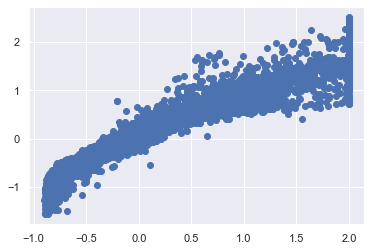

In [93]:
plt.scatter(y_test['price'], y_pred)

In [94]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= 'price ~ carat  + table  + x + y + z + cut_Good + cut_Ideal + cut_Premium  + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2', data = data_train).fit()
lm2.params

Intercept      -0.754756
carat           1.103132
table          -0.015326
x              -0.319054
y               0.294700
z              -0.117552
cut_Good        0.114412
cut_Ideal       0.147216
cut_Premium     0.145176
color_E        -0.047064
color_F        -0.062888
color_G        -0.100437
color_H        -0.207372
color_I        -0.323579
color_J        -0.468536
clarity_IF      1.001163
clarity_SI1     0.640509
clarity_SI2     0.430643
clarity_VS1     0.839580
clarity_VS2     0.767808
clarity_VVS1    0.943805
clarity_VVS2    0.933578
dtype: float64

In [95]:
print(lm2.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.454e+04
Date:                Sun, 21 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:55:43   Log-Likelihood:                 2940.6
No. Observations:               18870   AIC:                            -5837.
Df Residuals:                   18848   BIC:                            -5665.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7548      0.016    -46.855   

In [96]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,color_E,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
7598,-0.184654,1.114220,0.692304,-0.186479,-0.106356,-0.026801,1,0,0,0,...,0,0,0,0,0,1,0,0,0,-0.290884
8882,-1.043125,0.827280,0.244112,-1.295920,-1.222887,-1.169142,1,0,0,1,...,0,0,0,0,0,0,1,0,0,-0.843667
22763,-0.205593,1.544631,0.692304,-0.079973,-0.114944,0.070716,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-0.394531
6643,-0.917495,-1.109569,-0.652273,-0.958650,-0.956637,-1.043763,0,1,0,1,...,0,0,0,0,0,0,1,0,0,-0.710442
18701,1.804485,0.899015,-0.204081,1.526498,1.516910,1.630986,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1.233492


In [97]:
data_test.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,color_E,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
26809,0.443495,0.109928,-0.204081,0.559065,0.580741,0.572231,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0.122708
10087,0.024729,0.038193,-1.100465,0.212920,0.254370,0.237888,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0.082442
22817,-0.812804,0.181664,-0.652273,-0.852144,-0.793452,-0.793005,1,0,0,0,...,0,0,0,0,0,0,0,1,0,-0.689067
21676,0.045667,0.396869,-0.652273,0.204044,0.245781,0.265750,0,1,0,0,...,0,0,0,0,1,0,0,0,0,-0.272740
14846,0.694754,0.683810,-0.204081,0.816456,0.812636,0.892644,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0.642930


In [98]:
# Calculate MSE
#mse = np.mean((lm2.predict(data_train.drop('price',axis=1))-data_train['price'])**2)
mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [99]:
mse

price    0.046927
dtype: float64

In [100]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

price    0.216626
dtype: float64

In [101]:
for i,j in np.array(lm2.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.75) * Intercept + (1.1) * carat + (-0.02) * table + (-0.32) * x + (0.29) * y + (-0.12) * z + (0.11) * cut_Good + (0.15) * cut_Ideal + (0.15) * cut_Premium + (-0.05) * color_E + (-0.06) * color_F + (-0.1) * color_G + (-0.21) * color_H + (-0.32) * color_I + (-0.47) * color_J + (1.0) * clarity_IF + (0.64) * clarity_SI1 + (0.43) * clarity_SI2 + (0.84) * clarity_VS1 + (0.77) * clarity_VS2 + (0.94) * clarity_VVS1 + (0.93) * clarity_VVS2 + 

#### Running VIF without scaling

In [102]:
df1 = pd.read_csv('cubic_zirconia.csv')

In [103]:
df1.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [104]:
df1['cut']=np.where(df1['cut'] == 'Very Good', 'Good', df1['cut'])

In [105]:
df1['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Fair'], dtype=object)

In [106]:
df1.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [109]:
df1[df1.isin([0])].stack(0)

5821   x    0.0
       y    0.0
       z    0.0
6034   z    0.0
6215   x    0.0
       y    0.0
       z    0.0
10827  z    0.0
12498  z    0.0
12689  z    0.0
17506  x    0.0
       y    0.0
       z    0.0
18194  z    0.0
23758  z    0.0
dtype: object

In [110]:
df1.loc[((df['x'] == 0) | (df1['y'] == 0) | (df1['z'] == 0))]

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
5821,5822,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,6035,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,6216,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,10828,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,12499,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,12690,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,17507,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,18195,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,23759,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [111]:
df1.drop(df1[((df1['x'] == 0) | (df1['y'] == 0) | (df1['z'] == 0))].index, inplace=True)

In [112]:
df1[df1.isin([0])].stack(0)

Series([], dtype: object)

In [113]:
for column in df1.columns:
    if df1[column].dtype != 'object':
        median = df1[column].median()
        df1[column] = df1[column].fillna(median)    
        
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [114]:
df.dtypes

Unnamed: 0    float64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price         float64
dtype: object

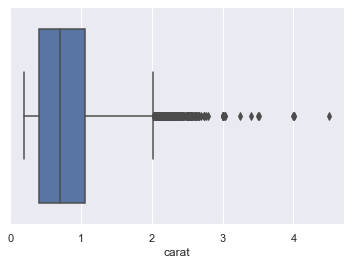

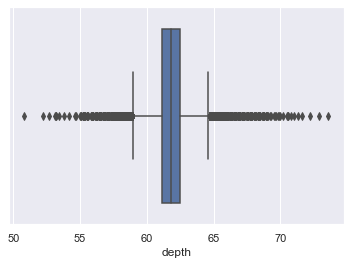

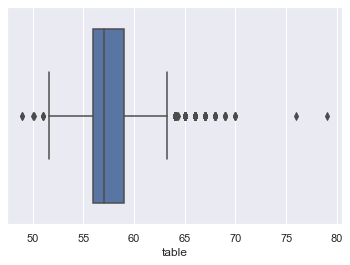

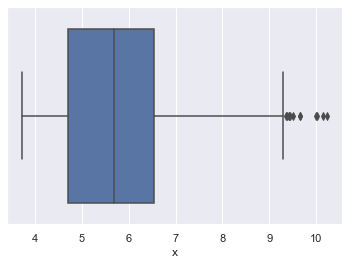

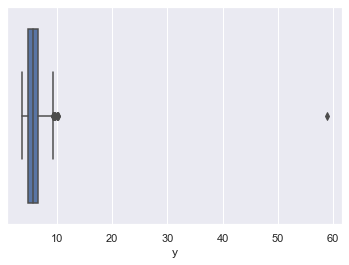

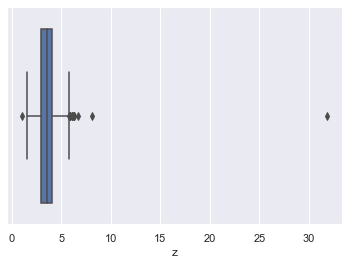

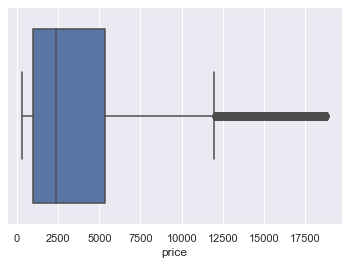

In [115]:
cols = ['carat' ,'depth', 'table', 'x', 'y', 'z',
       'price']

for i in cols:
    sns.boxplot(df1[i])
    plt.show()

In [116]:
cont=df1.dtypes[(df1.dtypes!='uint8') & (df1.dtypes!='object')].index

In [117]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [118]:
for column in df1[cont].columns:
    lr,ur=remove_outlier(df1[column])
    df1[column]=np.where(df1[column]>ur,ur,df1[column])
    df1[column]=np.where(df1[column]<lr,lr,df1[column])

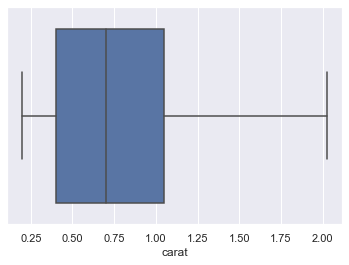

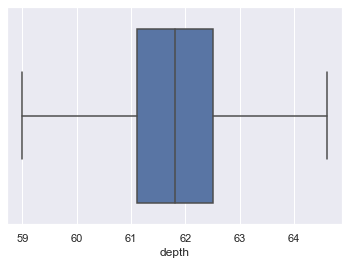

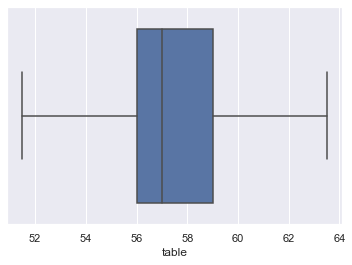

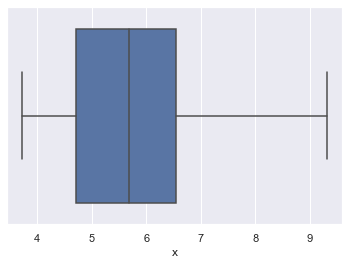

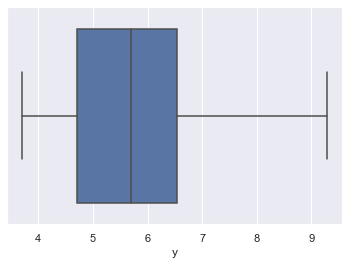

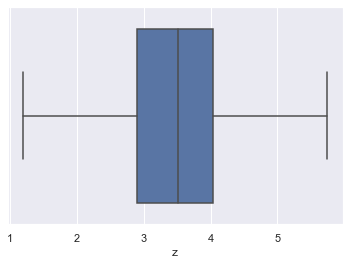

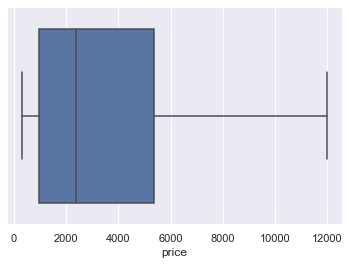

In [119]:
cols = ['carat' ,'depth', 'table', 'x', 'y', 'z',
       'price']

for i in cols:
    sns.boxplot(df1[i])
    plt.show()

In [149]:
df1.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,26958.0,NaN,NaN,NaN,13484.289524,7785.384674,1.0,6743.25,13485.5,20226.75,26967.0
carat,26958.0,NaN,NaN,NaN,0.793418,0.462311,0.2,0.4,0.7,1.05,2.025
cut,26958,4,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26958,7,G,5658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26958,8,SI1,6570,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26958.0,NaN,NaN,NaN,61.750608,1.21858,59.0,61.1,61.8,62.5,64.6
table,26958.0,NaN,NaN,NaN,57.435084,2.156693,51.5,56.0,57.0,59.0,63.5
x,26958.0,NaN,NaN,NaN,5.729937,1.126134,3.73,4.71,5.69,6.55,9.31
y,26958.0,NaN,NaN,NaN,5.73184,1.11809,3.71,4.7125,5.7,6.54,9.28125
z,26958.0,NaN,NaN,NaN,3.538045,0.696074,1.19,2.9,3.52,4.04,5.75


In [120]:
data = pd.get_dummies(df, columns=['cut','color','clarity'],drop_first=True)

In [121]:
data.head()

,Unnamed: 0,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.731904,-1.043125,0.253399,0.244112,-1.295920,-1.240065,-1.224865,-0.854851,0,1,...,0,0,0,0,1,0,0,0,0,0
1,-1.731776,-0.980310,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,-0.734303,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-1.731647,0.213173,0.325134,1.140496,0.275049,0.331668,0.335404,0.584271,1,0,...,0,0,0,0,0,0,0,0,0,1
3,-1.731519,-0.791865,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,-0.709945,0,1,...,0,0,0,0,0,0,1,0,0,0
4,-1.731390,-1.022187,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,-0.785257,0,1,...,0,0,0,0,0,0,0,0,1,0


In [122]:
data.columns

Index(['Unnamed: 0', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [123]:
# drop the id column as it is useless for the model
data_model = data.drop(columns=['Unnamed: 0'], axis=1)

In [124]:
# Copy all the predictor variables into X dataframe
X = data_model.drop('price', axis=1)

# Copy target into the y dataframe. 
y = data_model[['price']]

In [125]:
X.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,color_E,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043125,0.253399,0.244112,-1.295920,-1.240065,-1.224865,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,-0.980310,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.213173,0.325134,1.140496,0.275049,0.331668,0.335404,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,-0.791865,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.022187,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [126]:
X.shape

(26958, 22)

In [127]:
y.head()

,price
0,-0.854851
1,-0.734303
2,0.584271
3,-0.709945
4,-0.785257


In [128]:
y.shape

(26958, 1)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [130]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [131]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.102677643675933
The coefficient for depth is 0.0026598335322749744
The coefficient for table is -0.015068171563229243
The coefficient for x is -0.3141124999650798
The coefficient for y is 0.3046749078393516
The coefficient for z is -0.13216046334695788
The coefficient for cut_Good is 0.11432073599333384
The coefficient for cut_Ideal is 0.14766885951703368
The coefficient for cut_Premium is 0.14568423766263536
The coefficient for color_E is -0.04703466298535251
The coefficient for color_F is -0.06287100849363879
The coefficient for color_G is -0.1004629836071093
The coefficient for color_H is -0.20741796707431404
The coefficient for color_I is -0.32370262556310186
The coefficient for color_J is -0.4686151350500679
The coefficient for clarity_IF is 1.0010559427679449
The coefficient for clarity_SI1 is 0.6401330496880666
The coefficient for clarity_SI2 is 0.4303689001065578
The coefficient for clarity_VS1 is 0.8393453279276898
The coefficient for clarity_VS2

In [132]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.7547640167367966


In [133]:
# R square on training data
regression_model.score(X_train, y_train)

0.9418711571202334

In [134]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9380801521677695

In [135]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.20705151380359368

In [136]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.21662559740035145

In [137]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [138]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

In [139]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 33.31644213102772
depth ---> 4.461631970587766
table ---> 1.7305761274492844
x ---> 461.8849205570435
y ---> 462.7573930067428
z ---> 237.63484934205408
cut_Good ---> 10.378627375279843
cut_Ideal ---> 14.232168151865993
cut_Premium ---> 8.598516478802388
color_E ---> 2.3710558575934857
color_F ---> 2.3290500407398937


###### The vif vlaues remain same even running model without scaling

In [140]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,color_E,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
7598,-0.184654,1.114220,0.692304,-0.186479,-0.106356,-0.026801,1,0,0,0,...,0,0,0,0,0,1,0,0,0,-0.290884
8882,-1.043125,0.827280,0.244112,-1.295920,-1.222887,-1.169142,1,0,0,1,...,0,0,0,0,0,0,1,0,0,-0.843667
22763,-0.205593,1.544631,0.692304,-0.079973,-0.114944,0.070716,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-0.394531
6643,-0.917495,-1.109569,-0.652273,-0.958650,-0.956637,-1.043763,0,1,0,1,...,0,0,0,0,0,0,1,0,0,-0.710442
18701,1.804485,0.899015,-0.204081,1.526498,1.516910,1.630986,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1.233492


In [141]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat + depth + table + x+ y + z + cut_Good + cut_Ideal + cut_Premium  + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2', data = data_train).fit()
lm1.params

Intercept      -0.754764
carat           1.102678
depth           0.002660
table          -0.015068
x              -0.314112
y               0.304675
z              -0.132160
cut_Good        0.114321
cut_Ideal       0.147669
cut_Premium     0.145684
color_E        -0.047035
color_F        -0.062871
color_G        -0.100463
color_H        -0.207418
color_I        -0.323703
color_J        -0.468615
clarity_IF      1.001056
clarity_SI1     0.640133
clarity_SI2     0.430369
clarity_VS1     0.839345
clarity_VS2     0.767520
clarity_VVS1    0.943688
clarity_VVS2    0.933364
dtype: float64

In [142]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.388e+04
Date:                Sun, 21 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:23:49   Log-Likelihood:                 2940.9
No. Observations:               18870   AIC:                            -5836.
Df Residuals:                   18847   BIC:                            -5655.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7548      0.016    -46.855   

In [143]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [144]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.21662559740035103

In [145]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.9380801521677695

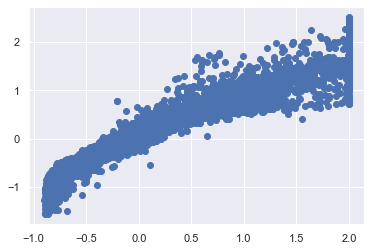

In [146]:
plt.scatter(y_test['price'], y_pred)

In [147]:
# After dropping 'depth' variable

import statsmodels.formula.api as smf
lm2 = smf.ols(formula= 'price ~ carat  + table  + x + y + z + cut_Good + cut_Ideal + cut_Premium  + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2', data = data_train).fit()
lm2.params

Intercept      -0.754756
carat           1.103132
table          -0.015326
x              -0.319054
y               0.294700
z              -0.117552
cut_Good        0.114412
cut_Ideal       0.147216
cut_Premium     0.145176
color_E        -0.047064
color_F        -0.062888
color_G        -0.100437
color_H        -0.207372
color_I        -0.323579
color_J        -0.468536
clarity_IF      1.001163
clarity_SI1     0.640509
clarity_SI2     0.430643
clarity_VS1     0.839580
clarity_VS2     0.767808
clarity_VVS1    0.943805
clarity_VVS2    0.933578
dtype: float64

In [148]:
print(lm2.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.454e+04
Date:                Sun, 21 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:29:00   Log-Likelihood:                 2940.6
No. Observations:               18870   AIC:                            -5837.
Df Residuals:                   18848   BIC:                            -5665.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7548      0.016    -46.855   